In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [115]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [116]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [117]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

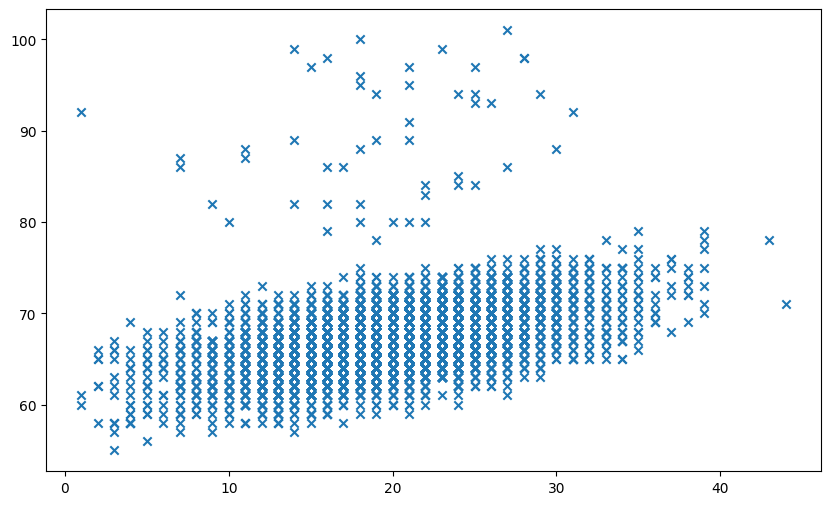

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Studied'],df['Exam_Score'],marker = 'x')

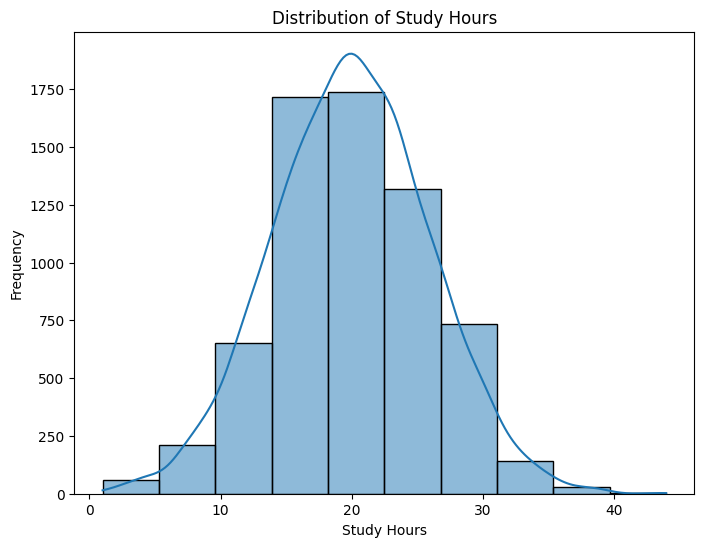

In [120]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Hours_Studied'], kde=True, bins=10)
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show()

In [121]:
# Calculate the total number of cells
total_cells = df.size  # .size gives rows * columns

# Calculate the total number of missing cells
missing_cells = df.isna().sum().sum()

# Calculate the percentage
missing_percentage = (missing_cells / total_cells) * 100

print(f'Missing data percentage: {missing_percentage:.2f}%')

Missing data percentage: 0.18%


In [122]:
df.dropna(inplace=True)
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [123]:
X = df.drop('Exam_Score', axis=1)
Y = df[['Exam_Score']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [124]:
# Identify numeric columns (usually int64 or float64)
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()

# Identify categorical columns (usually 'object' or 'category')
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
Categorical Features: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [125]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize the scaler
scaler = StandardScaler()

# 2. Fit and transform the numeric features
# IMPORTANT: You fit_transform() on your training data and only .transform() on your test data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("Data after scaling:")
print(X_train.head())

Data after scaling:
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
5955       0.834598   -1.561210               Medium                 Low   
694        0.667626   -0.607719               Medium              Medium   
352        0.834598   -0.260995               Medium                 Low   
3665      -1.336037   -0.000951                 High                High   
2430       0.500654   -0.000951                  Low                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
5955                         No    -0.716592        -0.975781   
694                         Yes    -0.036561         1.656133   
352                         Yes     0.643470        -0.698737   
3665                        Yes     2.003532         1.171306   
2430                         No    -0.716592        -0.837259   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
5955             High             Yes          -0.402090  

In [126]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Identify your categorical columns
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# Create a dictionary to store the fitted encoders
encoders = {}

print("Encoding Training Data...")
for col in categorical_features:
    # Create a new encoder for each column
    le = LabelEncoder()
    
    # Fit and transform the training data
    X_train[col] = le.fit_transform(X_train[col])
    
    # Store the fitted encoder in the dictionary
    encoders[col] = le

Encoding Training Data...


In [127]:
# Now, use the stored encoders to transform the test data
for col in categorical_features:
    # ONLY transform the test data
    X_test[col] = encoders[col].transform(X_test[col])

In [128]:
X_train.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
5955,0.834598,-1.561210,2,1,0,-0.716592,-0.975781,0,1,-0.402090,2,2,1,2,0.995515,0,2,1,0
694,0.667626,-0.607719,2,2,1,-0.036561,1.656133,2,1,1.218614,2,0,0,1,0.027750,0,1,2,0
352,0.834598,-0.260995,2,1,1,0.643470,-0.698737,0,0,-1.212442,2,2,1,2,1.963280,0,0,0,0
3665,-1.336037,-0.000951,0,0,1,2.003532,1.171306,0,1,-0.402090,0,0,1,2,0.027750,0,2,1,1
2430,0.500654,-0.000951,1,0,0,-0.716592,-0.837259,1,1,-1.212442,0,2,0,2,-0.940016,0,1,2,1


In [129]:
model = LinearRegression()
model.fit(X_train, Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [130]:
X_test.shape,Y_test.shape

((1914, 19), (1914, 1))

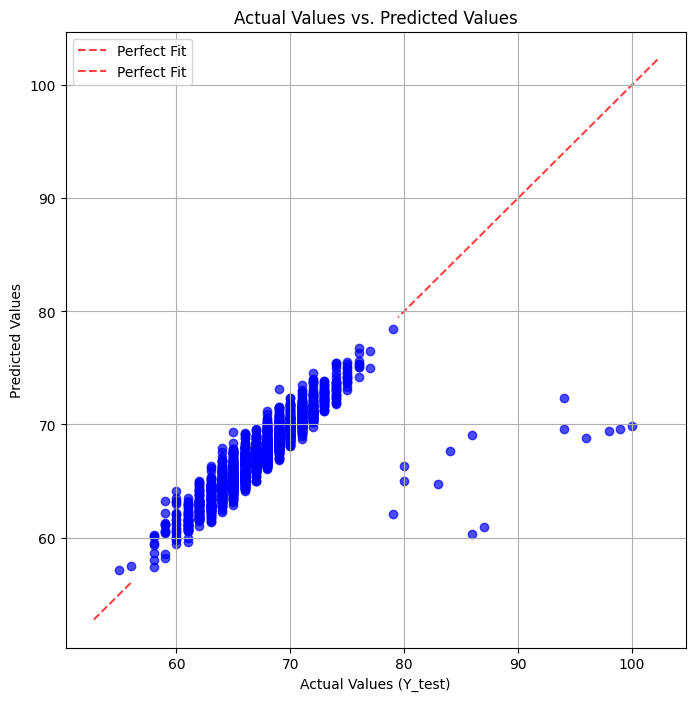

In [131]:
predictions = model.predict(X_test)


plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predictions, alpha=0.7, color='blue')
plt.title('Actual Values vs. Predicted Values')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values')

# Add a 45-degree line for reference (perfect predictions)
lims = [min(plt.xlim(), plt.ylim()), max(plt.xlim(), plt.ylim())]
plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Perfect Fit')

plt.legend()
plt.grid(True)
plt.show()

In [132]:
Y_test, predictions

(      Exam_Score
 2814          74
 4421          66
 4282          70
 1246          72
 4699          67
 ...          ...
 1115          69
 746           66
 6260          67
 4778          66
 1564          68
 
 [1914 rows x 1 columns],
 array([[73.37524378],
        [65.49086891],
        [70.50130892],
        ...,
        [68.00555907],
        [66.49616813],
        [67.03881957]], shape=(1914, 1)))

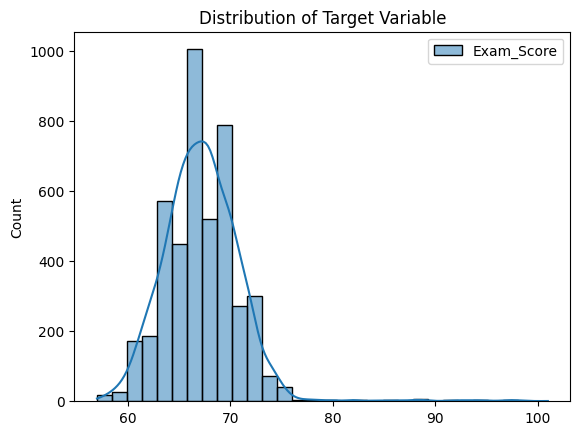

In [133]:
import seaborn as sns
sns.histplot(Y_train, bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assume Y_test and predictions are available
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R2) Score: {r2:.2f}")
rmse_dt = np.sqrt(mean_squared_error(Y_test, predictions))
print(f"Decision Tree RMSE: {rmse_dt:.2f}")

Mean Absolute Error (MAE): 1.06
Root Mean Squared Error (RMSE): 2.25
R-Squared (R2) Score: 0.67
Decision Tree RMSE: 2.25


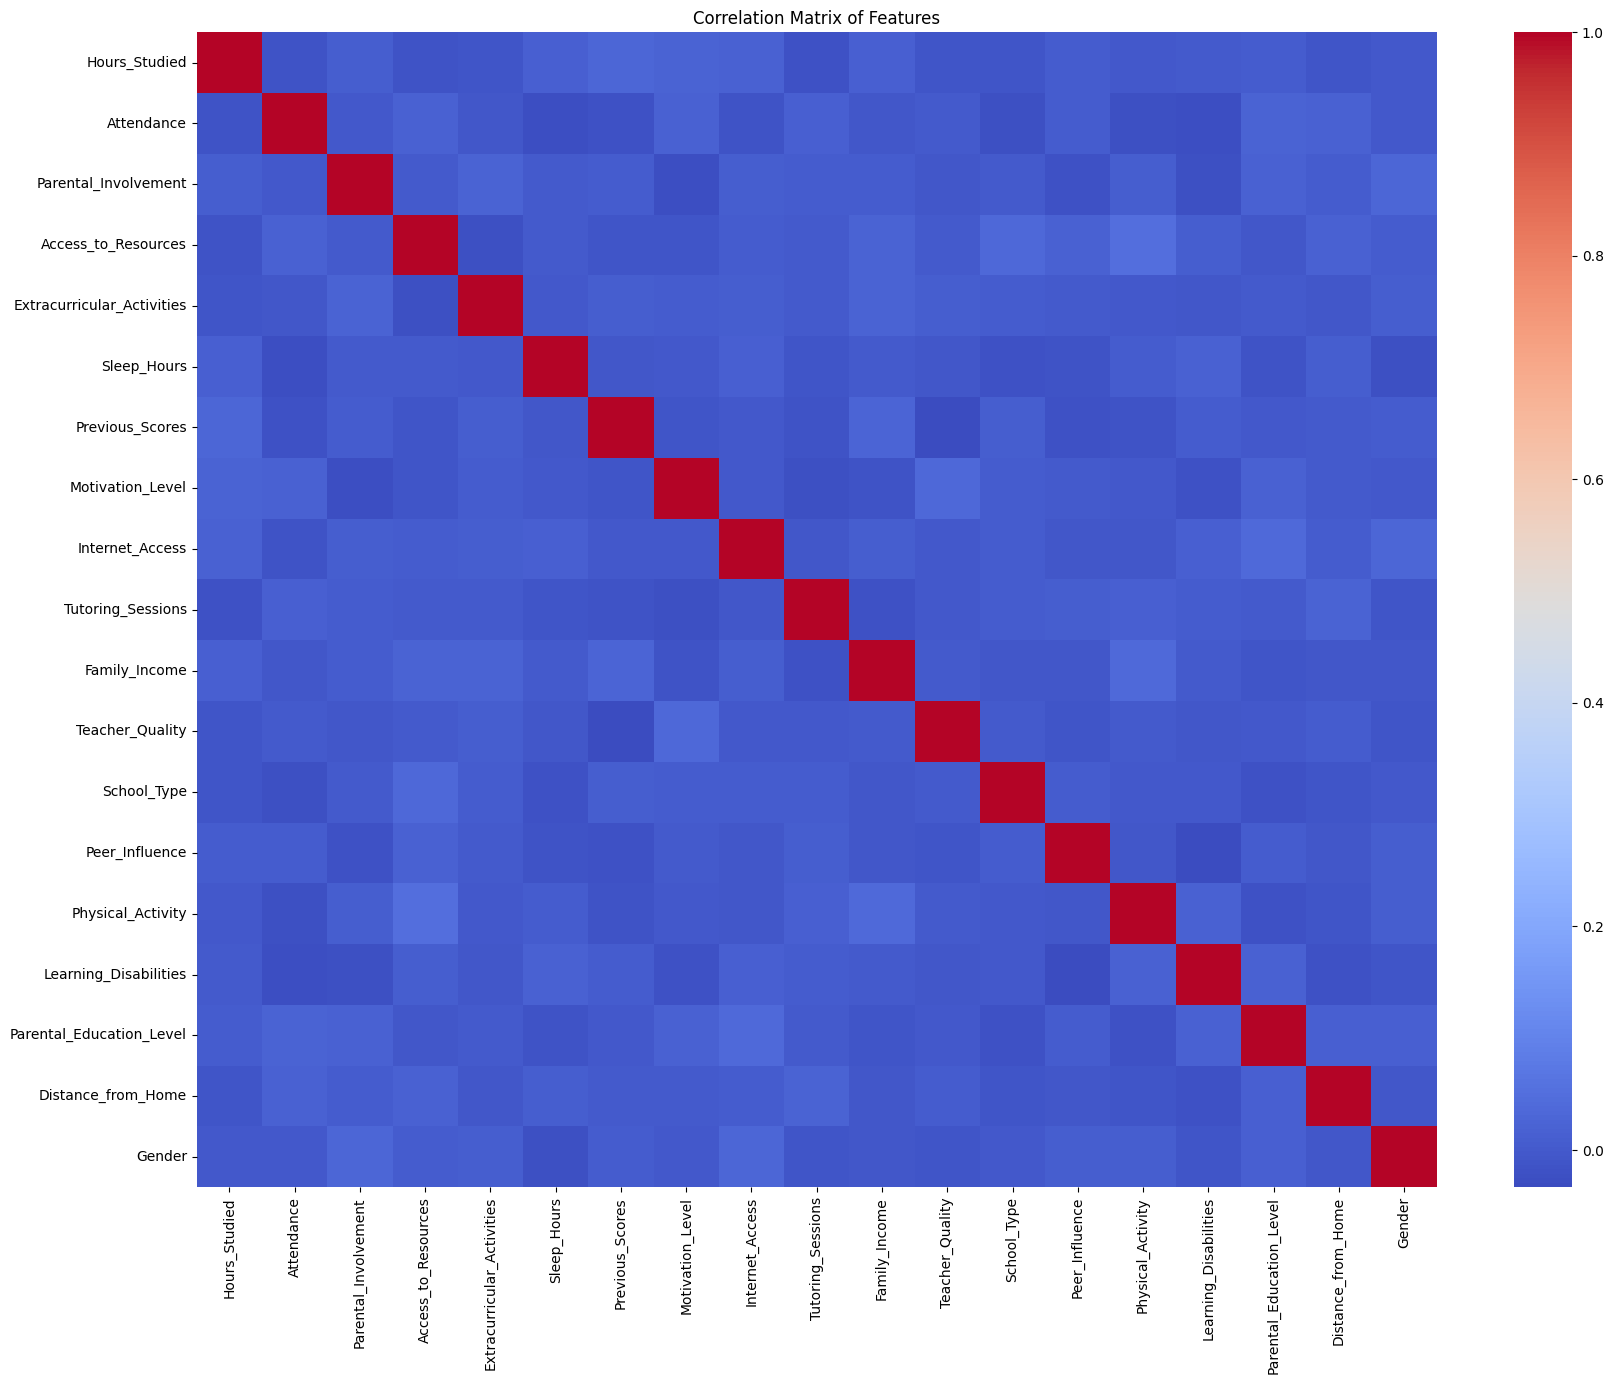

Attendance                    0.571484
Hours_Studied                 0.441921
Previous_Scores               0.174497
Tutoring_Sessions             0.149649
Peer_Influence                0.104640
Distance_from_Home            0.089577
Extracurricular_Activities    0.061627
Internet_Access               0.053852
Parental_Education_Level      0.046752
Physical_Activity             0.021820
Gender                       -0.002136
Motivation_Level             -0.017104
School_Type                  -0.018868
Sleep_Hours                  -0.024278
Family_Income                -0.028435
Teacher_Quality              -0.072636
Parental_Involvement         -0.080137
Learning_Disabilities        -0.081324
Access_to_Resources          -0.090096
dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

# To see correlation with the target, you can do:
correlation_with_target = X_train.corrwith(pd.Series(Y_train.squeeze, name='target'))
print(correlation_with_target.sort_values(ascending=False))